In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def static(r1,m1,r2,m2,theta):
    return(r2 * math.cos(theta)*m2*g - r1*math.cos(theta)*m1*g)


def static2(r1,m1,r2,m2,theta):
    return(r2 * math.sin(theta)*m1*g)


In [3]:
#Constants:
g= 9.81 #m/s^2
Al_Den = 2.7 #g/cm^3
r1 = 0.5 #m - Winch side
m1 = 0.5 #kg - Winch side

r2 = 1.5 #m - Intake side (variable)
m2 = 8 #kg - Intake side



In [15]:
#Calculating length dependent Moment of Inertia of extending arm

AvgArmCx = 2.57 #cm^2

Al_den = 2.7 #g/cm^3

def armMass(r):
    #Returns arm mass in g when given an arm length (r)
    #Uses an avearge crossectional area of 2.57 in^2 (16.84 cm^2)
    #The integrated mass of the arm is calculated by mulitpling 
    #the density of aluminum and r^2.
    
    return(22.74 * (r * 100) ** 2)

ArmExtend = 0

        
def ArmInteria(Extension):
    WinchArmLength = 0.32 #m
    #Winch Side Calculations
    #Static Arm Mass (no change in length)
    StaticArmMass_Winch = AvgArmCx*Al_den/2 * (WinchArmLength ** 2)
    StaticWinchMass = m1 * r1
    
    #Intake Side Calculations
    IntakeArmMass = armMass(Extension + 0.252) #The fully contracted arm has 0.252 m on the intake side.
    
    IntakeMass = m2 * (Extension + 0.252)
    
    return(IntakeMass + IntakeArmMass - (StaticArmMass_Winch + StaticWinchMass))
    


NameError: name 'ArmCx' is not defined

In [21]:
#-------Inputs
start = 0 #radians
end = (1) * math.pi #radians
armStart = 1
armEnd = 1.5

armAdjust = True

def ArmDataCalc(start,end,armStart,armEnd, armAdjust=True):
    #-------Function Code
    startVel = 0
    startAccel = 0
    curArmVel = 0
    curArmAccel = 0
    curArm = armStart
    curVel = startVel
    curAccel = startAccel
    theta = start
    maxRotVel = 2 #radians/sec
    maxRotAcc = 5 #radians/sec^2
    maxArmVel = 3 #m/s
    maxArmAcc = 10 # m/s^2
    WinchArmLength = 0.32

    ArmData = []
    #----Rotational Calculations-----

    AccelTime = maxRotVel/maxRotAcc
    duration = (abs(start-end))/maxRotVel + 2 * AccelTime
    DecellTime = duration - AccelTime
    curTor = static(r1,m1,curArm,m2,start)

    if armAdjust:
        #----Length Calculations-----
        ##Distance covered during acceleration phase
        ArmAccelTime = maxArmVel/maxArmAcc
        AccDist = (ArmAccelTime**2) * maxArmAcc
        #Calculate the total time to retract at steady velocity
        if armStart > AccDist:
            ArmRetractTime = (armStart - 2*AccDist)/maxArmVel + 2 * ArmAccelTime
            #Time to start slowing the retraction
            ArmRetractStop = ArmRetractTime
        else:
            ArmRetractTime = 2 * math.sqrt(armStart/maxArmAcc)
            #Time to start slowing the retraction
            ArmRetractStop = ArmRetractTime/2
        
        #Calculate total time required for extension
        ArmExtensionTime = (armEnd - AccDist)/ maxArmVel
        ##Back calcuate stop time so that end length is acheived when the arm finishes its rotation.
        ArmExtensionStop = duration - ArmAccelTime
        ArmExtensionStart = ArmExtensionStop - ArmExtensionTime - ArmAccelTime
        print("ArmAccelTime",ArmAccelTime)
        print("ArmRetractTime",ArmRetractTime)
        print("ArmRetractStop",ArmRetractStop)
        print("ArmExtensionTime",ArmExtensionTime)
        print("ArmExtensionStop",ArmExtensionStop)
        print("ArmExtensionStart",ArmExtensionStart)
        print("Duration", duration)
    else:
        armDist  = armEnd - armStart
        ArmAccelTime = maxArmVel/maxArmAcc
        AccDist = (ArmAccelTime**2) * maxArmAcc
        if abs(armDist) > AccDist:
            ArmRetractTime = (abs(armDist) - 2*AccDist)/maxArmVel + 2 * ArmAccelTime
            #Time to start slowing the retraction
            ArmRetractStop = ArmRetractTime
        else:
            ArmRetractTime = 2 * math.sqrt(abs(armDist)/maxArmAcc)
            #Time to start slowing the retraction
            ArmRetractStop = ArmRetractTime/2

    for time in np.arange(0,duration,0.02):
        #Setting the target angular acceleration and rotational velocity
        if time < AccelTime:
            curVel = curVel + maxRotAcc * 0.02
            curAccel = maxRotAcc
        elif time > AccelTime and time < DecellTime:
            curVel = maxRotVel
            curAccel = 0
        elif time > DecellTime:
            curVel = curVel - maxRotAcc * 0.02
            curAccel = -1 * maxRotAcc
        elif time > duration:
            curVel = 0
            curAccel = 0
        theta = theta + curVel * 0.02
        if armAdjust:
            #Setting the Arm Length acceleration and velocity
            if time < ArmAccelTime:
                curArmVel = curArmVel - maxArmAcc * 0.02
                curArmAcc = -1* maxArmAcc
            elif time > ArmAccelTime and time < ArmRetractStop:
                curArmVel = -1 * maxArmVel
                curArmAcc = 0
            elif time > ArmRetractStop and time < ArmRetractStop + ArmAccelTime:
                curArmVel = curArmVel + maxArmAcc * 0.02
                curArmAcc = maxArmAcc
            elif time > ArmRetractStop and time < ArmExtensionStart:
                curArmVel = 0
                curArmAcc = 0
            elif time > ArmExtensionStart and time < ArmExtensionStart + ArmAccelTime:
                curArmVel = curArmVel + maxArmAcc * 0.02
                curArmAcc = maxArmAcc
            elif time > ArmExtensionStart + ArmAccelTime and time < ArmExtensionStop:
                curArmVel = maxArmVel
                curArmAcc = 0
            elif time > ArmExtensionStop and time < duration:
                curArmVel = curArmVel - maxArmAcc * 0.02
                curArmAcc = -1* maxArmAcc
            elif time > duration:
                curArmVel = 0
                curArmAcc = 0
            curArm = curArm + curArmVel * 0.02

        StaticTor = static(r1,m1,curArm,m2,theta)
        I = ArmInteria(curArm)
        InertialTorque = I * curAccel
        TotalTorque = StaticTor + InertialTorque
        ArmData.append([time,curVel,theta, StaticTor,InertialTorque,TotalTorque,curArm, curArmVel])
    if not armAdjust:
        if armDist > 0:
            armFactor = 1
        else: 
            armFactor = -1
        curVel = 0
        curAccel = 0
        for armTime in np.arange(0,ArmRetractTime,0.02):
            if armTime < ArmAccelTime:
                curArmVel = curArmVel + armFactor * maxArmAcc * 0.02
                curArmAcc = armFactor * maxArmAcc
            elif armTime > ArmAccelTime and armTime < ArmRetractStop:
                curArmVel = armFactor * maxArmVel
                curArmAcc = 0
            elif armTime > ArmRetractStop and armTime < ArmRetractStop + ArmAccelTime:
                curArmVel = curArmVel - armFactor * maxArmAcc * 0.02
                curArmAcc = maxArmAcc
            curArm = curArm + curArmVel * 0.02
            StaticTor = static(curArm,m1,r2,m2,theta)
            I = ArmInteria(curArm)
            InertialTorque = I * curAccel
            TotalTorque = StaticTor + InertialTorque
            ArmData.append([time + armTime,curVel,theta, StaticTor,InertialTorque,TotalTorque,curArm, curArmVel])
        
    ArmData = pd.DataFrame(ArmData, columns=['Time','Velocity','Dist','Static','Inertial','Total',
                                             'Arm Length','Arm Velocity'])
    ArmData['Degree'] = 360/(2*math.pi)*ArmData['Dist']
    return(ArmData)

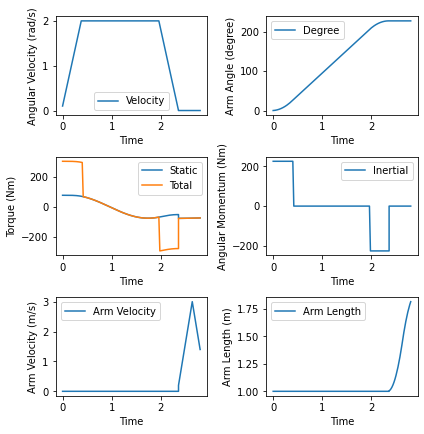

In [22]:
ArmData = ArmDataCalc(start,end,armStart,armEnd, armAdjust=False)
    
fig, axs = plt.subplots(3,2, figsize=(6,6))
ArmData.plot('Time','Velocity', ax=axs[0,0])
axs[0,0].set_ylabel("Angular Velocity (rad/s)")
ArmData.plot('Time','Degree', ax=axs[0,1])
axs[0,1].set_ylabel("Arm Angle (degree)")
ArmData.plot('Time','Static', ax=axs[1,0])
axs[1,0].set_ylabel("Torque (Nm)")
ArmData.plot('Time','Total', ax=axs[1,0])
ArmData.plot('Time','Inertial', ax=axs[1,1])
axs[1,1].set_ylabel("Angular Momentum (Nm)")
ArmData.plot('Time','Arm Length', ax=axs[2,1])
axs[2,1].set_ylabel("Arm Length (m)")
ArmData.plot('Time','Arm Velocity', ax=axs[2,0])
axs[2,0].set_ylabel("Arm Velocity (m/s)")
fig.tight_layout()
plt.show()

ArmAccelTime 0.3
ArmRetractTime 0.33333333333333337
ArmRetractStop 0.33333333333333337
ArmExtensionTime 0.20000000000000004
ArmExtensionStop 2.0707963267948966
ArmExtensionStart 1.5707963267948966
Duration 2.3707963267948964


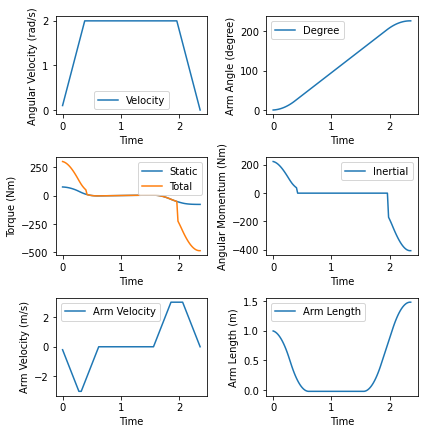

In [23]:
ArmData = ArmDataCalc(start,end,armStart,armEnd, armAdjust=True)
    
fig, axs = plt.subplots(3,2, figsize=(6,6))
ArmData.plot('Time','Velocity', ax=axs[0,0])
axs[0,0].set_ylabel("Angular Velocity (rad/s)")
ArmData.plot('Time','Degree', ax=axs[0,1])
axs[0,1].set_ylabel("Arm Angle (degree)")
ArmData.plot('Time','Static', ax=axs[1,0])
axs[1,0].set_ylabel("Torque (Nm)")
ArmData.plot('Time','Total', ax=axs[1,0])
ArmData.plot('Time','Inertial', ax=axs[1,1])
axs[1,1].set_ylabel("Angular Momentum (Nm)")
ArmData.plot('Time','Arm Length', ax=axs[2,1])
axs[2,1].set_ylabel("Arm Length (m)")
ArmData.plot('Time','Arm Velocity', ax=axs[2,0])
axs[2,0].set_ylabel("Arm Velocity (m/s)")
fig.tight_layout()
plt.show()

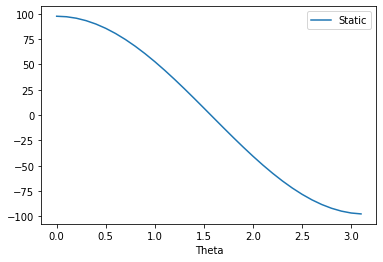

In [148]:
start = 0 * math.pi
end = (1) * math.pi
TorStatic = []
ArmLength = []
for theta in np.arange(start,end,0.1):
    TorStatic.append(static(r1,m1,r2,m2,theta))
ArmLength = np.full(len(TorStatic),1)
Data = pd.DataFrame({'Theta':np.arange(start,end,0.1),
                     'Static':TorStatic,
                    'ArmLength':ArmLength}, columns = ['Theta','Static','ArmLength'])

Data.plot(x='Theta',y='Static')


In [137]:
static(r1,m1,r2,m2,start)

0.0

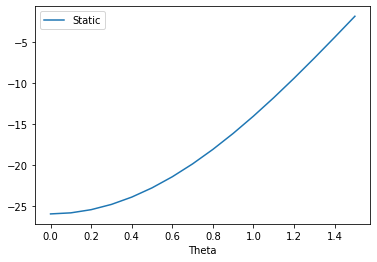

In [80]:
TorStatic = []
ArmLength = []

for theta in np.arange(start,end,0.1):
    TorStatic.append(static(r1,m1,r2,m2,theta))
ArmLength = np.full(len(TorStatic),1)
Data = pd.DataFrame({'Theta':np.arange(start,end,0.1),
                     'Static':TorStatic,
                    'ArmLength':ArmLength}, columns = ['Theta','Static','ArmLength'])

Data.plot(x='Theta',y='Static')

In [53]:
np.full(len(TorStatic),1)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])